<b sytle="font-size:25px;"><b style="color:'blue">What is Simple Linear Regression?</b></b>

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

    . One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
    . The other variable, denoted y, is regarded as the response, outcome, or dependent variable.
Because the other terms are used less frequently today, we'll use the <b style="color:blue">predictor"</b> and <b style="color:blue">"response"</b> terms to refer to the variables encountered in this course. The other terms are mentioned only to make you aware of them should you encounter them. Simple linear regression gets its adjective "simple," because it concerns the study of only one predictor variable. In contrast, multiple linear regression, which we study later in this course, gets its adjective "multiple," because it concerns the study of two or more predictor variables.

Types of relationships
Before proceeding, we must clarify what types of relationships we won't study in this course, namely, deterministic (or functional) relationships. Here is an example of a deterministic relationship.

fahrenheit vs celsius plot

Note that the observed (x, y) data points fall directly on a line. As you may remember, the relationship between degrees Fahrenheit and degrees Celsius is known to be:

<img src="https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/02simple/temps/index.jpg" alt = "Simple Regression">

That is, if you know the temperature in degrees Celsius, you can use this equation to determine the temperature in degrees Fahrenheit exactly.

Here are some examples of other deterministic relationships that students from previous semesters have shared:

Circumference = π × diameter
Hooke's Law: Y = α + βX, where Y = amount of stretch in a spring, and X = applied weight.
Ohm's Law: I = V/r, where V = voltage applied, r = resistance, and I = current.
Boyle's Law: For a constant temperature, P = α/V, where P = pressure, α = constant for each gas, and V = volume of gas.
For each of these deterministic relationships, the equation exactly describes the relationship between the two variables. This course does not examine deterministic relationships. Instead, we are interested in statistical relationships, in which the relationship between the variables is not perfect.

Here is an example of a statistical relationship. The response variable y is the mortality due to skin cancer (number of deaths per 10 million people) and the predictor variable x is the latitude (degrees North) at the center of each of 49 states in the U.S. (skincancer.txt) (The data were compiled in the 1950s, so Alaska and Hawaii were not yet states, and Washington, D.C. is included in the data set even though it is not technically a state.)

<img src="https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/02simple/scatterplot_skin_cancer/index.png" alt = "Regression">

You might anticipate that if you lived in the higher latitudes of the northern U.S., the less exposed you'd be to the harmful rays of the sun, and therefore, the less risk you'd have of death due to skin cancer. The scatter plot supports such a hypothesis. There appears to be a negative linear relationship between latitude and mortality due to skin cancer, but the relationship is not perfect. Indeed, the plot exhibits some "trend," but it also exhibits some "scatter." Therefore, it is a statistical relationship, not a deterministic one.

Some other examples of statistical relationships might include:

Height and weight — as height increases, you'd expect weight to increase, but not perfectly.
Alcohol consumed and blood alcohol content — as alcohol consumption increases, you'd expect one's blood alcohol content to increase, but not perfectly.
Vital lung capacity and pack-years of smoking — as amount of smoking increases (as quantified by the number of pack-years of smoking), you'd expect lung function (as quantified by vital lung capacity) to decrease, but not perfectly.
Driving speed and gas mileage — as driving speed increases, you'd expect gas mileage to decrease, but not perfectly.
Okay, so let's study statistical relationships between one response variable y and one predictor variable x!


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
tf.compat.v1.disable_eager_execution()
%matplotlib inline

# <b style="color:blue"> Why we use Seed Function ? </b>

![](http://)Seed function is used to save the state of a random function, so that it can generate same random numbers on multiple executions of the code on the same machine or on different machines (for a specific seed value). The seed value is the previous value number generated by the generator.

In [2]:
tf.compat.v1.set_random_seed(1)
np.random.seed(1)

In [3]:
#Create Face Datasets
x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size = x.shape)
y = np.power(x, 2) + noise

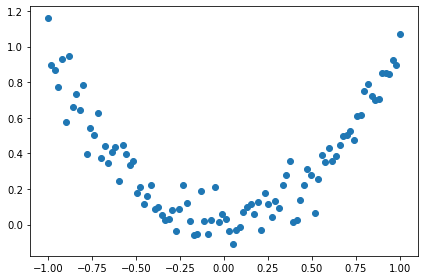

In [4]:
# Plot fake Datasets
plt.scatter(x, y)
plt.tight_layout()
plt.show()

# Create Tensorflow Variable

In [5]:

tf_x = tf.compat.v1.placeholder(tf.float32, x.shape)
tf_y = tf.compat.v1.placeholder(tf.float32, y.shape)

# Create Neural networks

In [6]:
l1= tf.compat.v1.layers.dense(tf_x, 10, tf.nn.relu)
output= tf.compat.v1.layers.dense(l1, 1)

# Compute Cost

In [7]:
loss = tf.compat.v1.losses.mean_squared_error(tf_y, output)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.5)
train_optimizers = optimizer.minimize(loss)

# Create Session()

In [8]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

# Visualize the hole thing

# plt.ion()
The matplotlib.pyplot.ion() is used to turn on interactive mode. To check the status of interactive mode one can run the below commands,

* plt.rcParams['interactive']

or, this command

* plt.isinteractive()

Matplotlib also interacts with different backends behind the scene. The workhorse behind rendering charts in matplotlib is its backends. Some interactive backends dynamically update and pop up to users after every change. By default, the interactive mode is turned off.

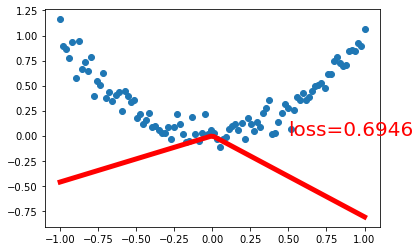

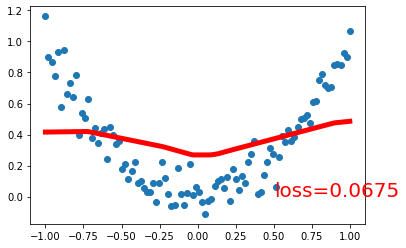

In [9]:
plt.ion()

for step in range(10):
    _, l, pred = sess.run([train_optimizers, loss, output], {tf_x:x, tf_y:y})
    if step % 5 == 0:
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw= 5)
        plt.text(0.5, 0, 'loss=%.4f'%l, fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()